In [4]:
import pandas as pd
import numpy as np
import statistics as st
from scipy.stats import mode
import matplotlib.pyplot  as plt
import seaborn as sns

PREPROCESSING DATA

In [5]:
data=pd.read_csv("C:/Users/HP/Desktop/Pacmann/all_conditions.csv", sep=",")
data.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI,TBG_measured,TBG,referral_source,patient_id,target_hyper,target_hypo,target_bp,target_rep,target_sick
0,41.0,F,f,f,f,f,f,f,f,f,...,109.0,f,NaN,SVHC,3733,negative,negative,negative,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,other,1442,negative,negative,negative,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,120.0,f,NaN,other,2965,negative,negative,negative,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,NaN,other,806,negative,negative,negative,replacement therapy,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,70.0,f,NaN,SVI,2807,negative,negative,negative,negative,negative


In [6]:
data.dtypes

age                    float64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
patient_id               int64
target_hyper            object
target_hypo             object
target_b

In [7]:
#deskripsi data asli
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0,2800.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN,1895.603214
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN,1091.130220
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN,1.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN,955.750000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN,1913.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN,2837.500000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN,3772.000000


In [8]:
## number of NA for each variable
np.sum(data.isnull())

age                       1
sex                     110
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     284
T3_measured               0
T3                      585
TT4_measured              0
TT4                     184
T4U_measured              0
T4U                     297
FTI_measured              0
FTI                     295
TBG_measured              0
TBG                    2800
referral_source           0
patient_id                0
target_hyper              0
target_hypo               0
target_bp                 0
target_rep                0
target_sick               0
dtype: int64

In [9]:
data.dropna(axis=0, how='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI,TBG_measured,TBG,referral_source,patient_id,target_hyper,target_hypo,target_bp,target_rep,target_sick
0,41.0,F,f,f,f,f,f,f,f,f,...,109.0,f,NaN,SVHC,3733,negative,negative,negative,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,other,1442,negative,negative,negative,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,120.0,f,NaN,other,2965,negative,negative,negative,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,NaN,other,806,negative,negative,negative,replacement therapy,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,70.0,f,NaN,SVI,2807,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,148.0,f,NaN,SVI,3689,negative,negative,negative,negative,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,72.0,f,NaN,other,3652,negative,negative,negative,negative,sick
2797,75.0,M,f,f,f,f,f,f,f,f,...,183.0,f,NaN,other,1287,negative,negative,negative,negative,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,121.0,f,NaN,other,3496,negative,negative,negative,negative,negative


In [10]:
## number of NA for each variable
np.sum(data.isnull())

age                       1
sex                     110
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     284
T3_measured               0
T3                      585
TT4_measured              0
TT4                     184
T4U_measured              0
T4U                     297
FTI_measured              0
FTI                     295
TBG_measured              0
TBG                    2800
referral_source           0
patient_id                0
target_hyper              0
target_hypo               0
target_bp                 0
target_rep                0
target_sick               0
dtype: int64

In [11]:
# NA lebih dari 1/3 data dan drop id
data=data.drop(["patient_id","TBG"],axis=1)
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U,FTI_measured,FTI,TBG_measured,referral_source,target_hyper,target_hypo,target_bp,target_rep,target_sick
0,41.0,F,f,f,f,f,f,f,f,f,...,1.14,t,109.0,f,SVHC,negative,negative,negative,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,other,negative,negative,negative,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,0.91,t,120.0,f,other,negative,negative,negative,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,NaN,f,other,negative,negative,negative,replacement therapy,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,0.87,t,70.0,f,SVI,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,1.05,t,148.0,f,SVI,negative,negative,negative,negative,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,0.88,t,72.0,f,other,negative,negative,negative,negative,sick
2797,75.0,M,f,f,f,f,f,f,f,f,...,0.80,t,183.0,f,other,negative,negative,negative,negative,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,0.83,t,121.0,f,other,negative,negative,negative,negative,negative


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2799 non-null   float64
 1   sex                  2690 non-null   object 
 2   on_thyroxine         2800 non-null   object 
 3   query_on_thyroxine   2800 non-null   object 
 4   on_antithyroid_meds  2800 non-null   object 
 5   sick                 2800 non-null   object 
 6   pregnant             2800 non-null   object 
 7   thyroid_surgery      2800 non-null   object 
 8   I131_treatment       2800 non-null   object 
 9   query_hypothyroid    2800 non-null   object 
 10  query_hyperthyroid   2800 non-null   object 
 11  lithium              2800 non-null   object 
 12  goitre               2800 non-null   object 
 13  tumor                2800 non-null   object 
 14  hypopituitary        2800 non-null   object 
 15  psych                2800 non-null   o

In [13]:
#mengganti missing value data numerik dengan mean dan median
data['age']=data['age'].fillna(data['age'].median())
data['TSH']=data['TSH'].fillna(data['TSH'].median())
data['T3']=data['T3'].fillna(data['T3'].median())
data['TT4']=data['TT4'].fillna(data['TT4'].median())
data['T4U']=data['T4U'].fillna(data['T4U'].median())
data['FTI']=data['FTI'].fillna(data['FTI'].median())
np.sum(data.isnull())

age                      0
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                      0
T3_measured              0
T3                       0
TT4_measured             0
TT4                      0
T4U_measured             0
T4U                      0
FTI_measured             0
FTI                      0
TBG_measured             0
referral_source          0
target_hyper             0
target_hypo              0
target_bp                0
target_rep               0
target_sick              0
dtype: int64

In [14]:
from statistics import mode

In [15]:
st.mode(data['sex'])

'F'

In [16]:
from scipy.stats import mode
data['sex']=data['sex'].fillna('F')
np.sum(data.isnull())

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
target_hyper           0
target_hypo            0
target_bp              0
target_rep             0
target_sick            0
dtype: int64

In [17]:
#Reduksi Variabel
data=data.drop(["TSH_measured","T3_measured","TT4_measured","T4U_measured",'TBG_measured',"FTI_measured"],axis=1)
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source,target_hyper,target_hypo,target_bp,target_rep,target_sick
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,125.0,1.14,109.0,SVHC,negative,negative,negative,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,102.0,0.98,107.0,other,negative,negative,negative,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,2.0,109.0,0.91,120.0,other,negative,negative,negative,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,175.0,0.98,107.0,other,negative,negative,negative,replacement therapy,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,61.0,0.87,70.0,SVI,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,2.0,155.0,1.05,148.0,SVI,negative,negative,negative,negative,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,0.7,63.0,0.88,72.0,other,negative,negative,negative,negative,sick
2797,75.0,M,f,f,f,f,f,f,f,f,...,2.0,147.0,0.80,183.0,other,negative,negative,negative,negative,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,2.0,100.0,0.83,121.0,other,negative,negative,negative,negative,negative


outlier

In [18]:
from scipy import stats
z= np.abs(stats.zscore(data._get_numeric_data()))
#mendapatkan data yang tidak outlier pada semua variabel
data1=data[(z<3).all(axis=1)]
data1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source,target_hyper,target_hypo,target_bp,target_rep,target_sick
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,125.0,1.14,109.0,SVHC,negative,negative,negative,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,102.0,0.98,107.0,other,negative,negative,negative,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,2.0,109.0,0.91,120.0,other,negative,negative,negative,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,175.0,0.98,107.0,other,negative,negative,negative,replacement therapy,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,61.0,0.87,70.0,SVI,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,M,f,f,f,f,f,f,f,f,...,2.0,155.0,1.05,148.0,SVI,negative,negative,negative,negative,negative
2796,73.0,M,f,t,f,f,f,f,f,f,...,0.7,63.0,0.88,72.0,other,negative,negative,negative,negative,sick
2797,75.0,M,f,f,f,f,f,f,f,f,...,2.0,147.0,0.80,183.0,other,negative,negative,negative,negative,negative
2798,60.0,F,f,f,f,f,f,f,f,f,...,2.0,100.0,0.83,121.0,other,negative,negative,negative,negative,negative


keterangan:
data = data dengan outlier
data1 = data tanpa outlier
datareduc = data setelah di drop beberapa variabel

In [19]:
#deskripsi data bersih
data1.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000
mean,52.100796,2.641091,1.960099,106.506631,0.980339,109.437666
std,18.964665,5.192114,0.556832,26.584593,0.149911,24.066164
min,1.000000,0.005000,0.050000,14.000000,0.480000,33.000000
25%,37.000000,0.610000,1.700000,89.000000,0.890000,95.000000
50%,55.000000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,68.000000,2.400000,2.200000,120.000000,1.060000,121.000000
max,94.000000,58.000000,4.200000,210.000000,1.530000,201.000000


<AxesSubplot:>

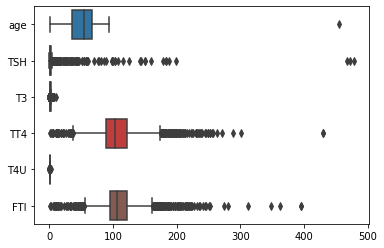

In [20]:
#masih terdapat outlier
sns.boxplot(data=data[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']], orient='h')

<AxesSubplot:>

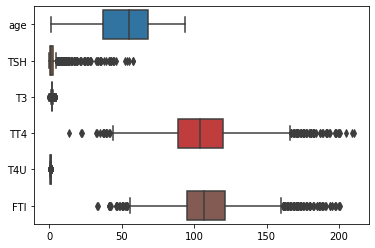

In [21]:
#tidak terdapat outlier
sns.boxplot(data=data1[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']], orient='h')

FEATURE SELECTION

Metode Chi Square (y = kategorik, x=kategorik)

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

X = data1.drop(["age","TSH","T3","TT4","T4U","FTI","target_sick"],axis=1)
X = pd.get_dummies(X)
y = data1["target_sick"]
y = pd.get_dummies(y)

#feature selection using chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
#create df for scores
data1scores = pd.DataFrame(fit.scores_)
#create df for column names
data1columns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([data1columns,data1scores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_chi2']
#print 5 best features
print(featureScores.nlargest(10,'Score_chi2'))

                       Selected_columns  Score_chi2
33                  referral_source_SVI  180.709317
34                referral_source_other   62.048627
37            target_hyper_hyperthyroid   61.242182
9                                sick_t   20.244087
27                      hypopituitary_t   15.091463
39  target_hypo_compensated hypothyroid   12.806081
17                  query_hypothyroid_t   12.119462
3                        on_thyroxine_t   11.200691
31                 referral_source_SVHC    8.877362
43  target_bp_decreased binding protein    6.003203


Metode LDA (y=kategorik x=kontinu)

In [23]:
data11=data1[["age","TSH","T3","TT4","T4U","FTI",'target_sick']]
y2=data11["target_sick"]
X2=data11.drop(['target_sick'],axis=1)

In [24]:
y2=y2.replace({'negative': 0})
y2=y2.replace({'sick': 1})

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#feature selection using f_classif
fs = SelectKBest(score_func=f_classif, k=4)
fit = fs.fit(X2,y2)

#create df for scores
datascores = pd.DataFrame(fit.scores_)

#create df for column names
datacolumns = pd.DataFrame(data11.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([datacolumns,datascores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA'] 

#print 3 best features
print(featureScores.nlargest(4,'Score_ANOVA'))

  Selected_columns  Score_ANOVA
2               T3   881.118744
4              T4U   175.375515
0              age    75.505444
3              TT4    46.626196


In [26]:
data2=data1[["target_sick","referral_source","target_hyper","sick","hypopituitary","target_hypo","query_hypothyroid","on_thyroxine","target_bp","T3","T4U","TT4","age"]]
data2

,target_sick,referral_source,target_hyper,sick,hypopituitary,target_hypo,query_hypothyroid,on_thyroxine,target_bp,T3,T4U,TT4,age
0,negative,SVHC,negative,f,f,negative,f,f,negative,2.5,1.14,125.0,41.0
1,negative,other,negative,f,f,negative,f,f,negative,2.0,0.98,102.0,23.0
2,negative,other,negative,f,f,negative,f,f,negative,2.0,0.91,109.0,46.0
3,negative,other,negative,f,f,negative,f,t,negative,1.9,0.98,175.0,70.0
4,negative,SVI,negative,f,f,negative,f,f,negative,1.2,0.87,61.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,negative,SVI,negative,f,f,negative,f,f,negative,2.0,1.05,155.0,70.0
2796,sick,other,negative,f,f,negative,f,f,negative,0.7,0.88,63.0,73.0
2797,negative,other,negative,f,f,negative,f,f,negative,2.0,0.80,147.0,75.0
2798,negative,other,negative,f,f,negative,f,f,negative,2.0,0.83,100.0,60.0


In [27]:
data3= data2.copy()

In [28]:
data3

,target_sick,referral_source,target_hyper,sick,hypopituitary,target_hypo,query_hypothyroid,on_thyroxine,target_bp,T3,T4U,TT4,age
0,negative,SVHC,negative,f,f,negative,f,f,negative,2.5,1.14,125.0,41.0
1,negative,other,negative,f,f,negative,f,f,negative,2.0,0.98,102.0,23.0
2,negative,other,negative,f,f,negative,f,f,negative,2.0,0.91,109.0,46.0
3,negative,other,negative,f,f,negative,f,t,negative,1.9,0.98,175.0,70.0
4,negative,SVI,negative,f,f,negative,f,f,negative,1.2,0.87,61.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,negative,SVI,negative,f,f,negative,f,f,negative,2.0,1.05,155.0,70.0
2796,sick,other,negative,f,f,negative,f,f,negative,0.7,0.88,63.0,73.0
2797,negative,other,negative,f,f,negative,f,f,negative,2.0,0.80,147.0,75.0
2798,negative,other,negative,f,f,negative,f,f,negative,2.0,0.83,100.0,60.0


In [29]:
#mengganti ke angka semua
data3['target_sick']=data3['target_sick'].replace(['negative','sick'],['0','1']).astype(int)
data3['referral_source']=data3['referral_source'].replace(['SVHC','SVHD','STMW','SVI','other'],['0','1','2','3','4'])
data3['target_hyper']=data3['target_hyper'].replace(['negative','hyperthyroid','goitre','T3 toxic'],['0','1','2','3'])
data3['sick']=data3['sick'].replace(['f','t'],['0','1'])
data3['hypopituitary']=data3['hypopituitary'].replace(['f','t'],['0','1'])
data3['target_hypo']=data3['target_hypo'].replace(['negative','compensated hypothyroid','primary hypothyroid','secondary hypothyroid'],['0','1','2','3'])
data3['query_hypothyroid']=data3['query_hypothyroid'].replace(['f','t'],['0','1'])
data3['on_thyroxine']=data3['on_thyroxine'].replace(['f','t'],['0','1'])
data3['target_bp']=data3['target_bp'].replace(['negative','sick','increased binding protein','decreased binding protein'],['0','1','2','3'])
data3

,target_sick,referral_source,target_hyper,sick,hypopituitary,target_hypo,query_hypothyroid,on_thyroxine,target_bp,T3,T4U,TT4,age
0,0,0,0,0,0,0,0,0,0,2.5,1.14,125.0,41.0
1,0,4,0,0,0,0,0,0,0,2.0,0.98,102.0,23.0
2,0,4,0,0,0,0,0,0,0,2.0,0.91,109.0,46.0
3,0,4,0,0,0,0,0,1,0,1.9,0.98,175.0,70.0
4,0,3,0,0,0,0,0,0,0,1.2,0.87,61.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0,3,0,0,0,0,0,0,0,2.0,1.05,155.0,70.0
2796,1,4,0,0,0,0,0,0,0,0.7,0.88,63.0,73.0
2797,0,4,0,0,0,0,0,0,0,2.0,0.80,147.0,75.0
2798,0,4,0,0,0,0,0,0,0,2.0,0.83,100.0,60.0


In [30]:
data3.dtypes

target_sick            int32
referral_source       object
target_hyper          object
sick                  object
hypopituitary         object
target_hypo           object
query_hypothyroid     object
on_thyroxine          object
target_bp             object
T3                   float64
T4U                  float64
TT4                  float64
age                  float64
dtype: object

In [31]:
x=data3.drop(['target_sick'], axis=1)
y=data3['target_sick']

SVM LINIER

In [40]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_linear =  SVC(kernel='linear')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x, y, test_size=0.25)
    svclassifier_linear=svclassifier_linear.fit(x_train_3,y_train_3)
    y_pred3 = svclassifier_linear.predict(x_test_3)
    cm.append((confusion_matrix(y_test_3, y_pred3)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print(akurasi3)
print(spesifisiti3)
print(sensitiviti3)

df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

#menghitung auc
auc_svclassifier_linear3= round(roc_auc_score(y_test_3, y_pred3)*100, 2)
auc_svclassifier_linear3

0.976060606060606
0.779595424764583
0.9890304235001915


90.14

Text(0.5, 15.0, 'predicted label')

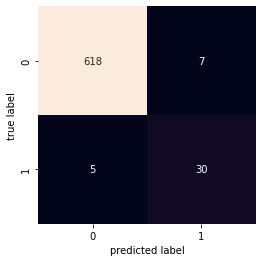

In [41]:
from sklearn.metrics import confusion_matrix
cm_svmlinear1 = confusion_matrix(y_test_3, y_pred3)
sns.heatmap(cm_svmlinear1.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

<function matplotlib.pyplot.show(close=None, block=None)>

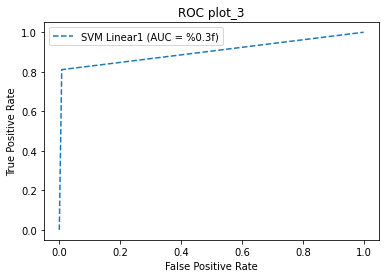

In [42]:
#menghitung roc
svclassifier_linear_fpr, svclassifier_linear_tpr, _ = roc_curve(y_test_3, y_pred3)

#roc curve
plt.plot(svclassifier_linear_fpr, svclassifier_linear_tpr, linestyle = '--', label = 'SVM Linear1 (AUC = %0.3f)')

plt.title('ROC plot_3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [43]:
### METODE CV ###
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import svm

kf4 = KFold(n_splits=10, shuffle=False)
kf4.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf4.split(y):
    x_train_4, x_test_4 = x.iloc[train_index], x.iloc[test_index]
    y_train_4, y_test_4 = y[train_index], y[test_index]

In [44]:
svclassifier_linear =  SVC(kernel='linear')
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_linear = svclassifier_linear.fit(x_train_4,y_train_4)
    y_pred4 = svclassifier_linear.predict(x_test_4)
    cm.append((confusion_matrix(y_test_4, y_pred4)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi4=np.mean(ac)
spesifisiti4=np.mean(sp)
sensitiviti4=np.mean(se)
print(akurasi4)
print(spesifisiti4)
print(sensitiviti4)

df_k4=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k4=pd.concat([df_k4,pd.DataFrame(test[i])],axis=1)
df_k4.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k4

#menghitung auc
auc_svmlinear4= round(roc_auc_score(y_test_4, y_pred4)*100, 2)
auc_svmlinear4

0.973384030418251
0.7647058823529411
0.9878048780487806


87.63

Text(0.5, 15.0, 'predicted label')

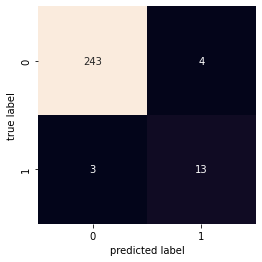

In [45]:
from sklearn.metrics import confusion_matrix
cm_svmlinear2 = confusion_matrix(y_test_4, y_pred4)
sns.heatmap(cm_svmlinear2.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

<function matplotlib.pyplot.show(close=None, block=None)>

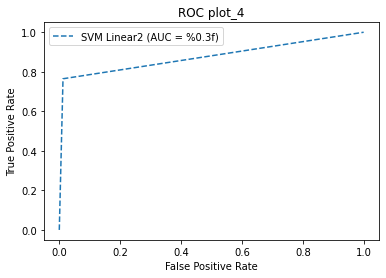

In [46]:
#menghitung roc
svclassifier_linear2_fpr, svclassifier_linear2_tpr, _ = roc_curve(y_test_4, y_pred4)

#roc curve
plt.plot(svclassifier_linear2_fpr, svclassifier_linear2_tpr, linestyle = '--', label = 'SVM Linear2 (AUC = %0.3f)')

plt.title('ROC plot_4')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

SVM POLINOM

In [47]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_polinom = SVC(kernel='poly')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x, y, test_size=0.25)
    svclassifier_polinom=svclassifier_polinom.fit(x_train_5,y_train_5)
    y_pred5 = svclassifier_polinom.predict(x_test_5)
    cm.append((confusion_matrix(y_test_5, y_pred5)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi5=np.mean(ac)
spesifisiti5=np.mean(sp)
sensitiviti5=np.mean(se)
print(akurasi5)
print(spesifisiti5)
print(sensitiviti5)

df_k5=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k5=pd.concat([df_k5,pd.DataFrame(test[i])],axis=1)
df_k5.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k5

#menghitung auc
auc_svclassifier_polinom5= round(roc_auc_score(y_test_5, y_pred5)*100, 2)
auc_svclassifier_polinom5

0.9393939393939392
0.0
1.0


50.0

Text(0.5, 15.0, 'predicted label')

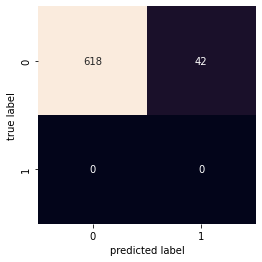

In [48]:
from sklearn.metrics import confusion_matrix
cm_svmpolinom1 = confusion_matrix(y_test_5, y_pred5)
sns.heatmap(cm_svmpolinom1.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

<function matplotlib.pyplot.show(close=None, block=None)>

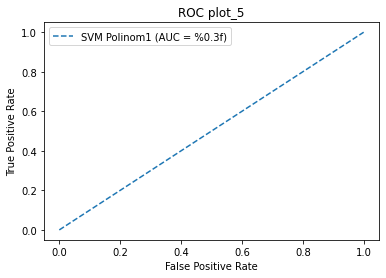

In [49]:
#menghitung roc
svclassifier_polinom_fpr, svclassifier_polinom_tpr, _ = roc_curve(y_test_5, y_pred5)

#roc curve
plt.plot(svclassifier_polinom_fpr, svclassifier_polinom_tpr, linestyle = '--', label = 'SVM Polinom1 (AUC = %0.3f)')

plt.title('ROC plot_5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [50]:
### METODE CV ###
from sklearn.model_selection import KFold
kf6 = KFold(n_splits=10, shuffle=False)
kf6.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf6.split(y):
    x_train_6, x_test_6 = x.iloc[train_index], x.iloc[test_index]
    y_train_6, y_test_6 = y[train_index], y[test_index]

In [51]:
### METODE CV ###

svclassifier_polinom =  SVC(kernel='poly')
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_polinom = svclassifier_polinom.fit(x_train_6,y_train_6)
    y_pred6 = svclassifier_polinom.predict(x_test_6)
    cm.append((confusion_matrix(y_test_6, y_pred6)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi6=np.mean(ac)
spesifisiti6=np.mean(sp)
sensitiviti6=np.mean(se)
print(akurasi6)
print(spesifisiti6)
print(sensitiviti6)

df_k6=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k6=pd.concat([df_k6,pd.DataFrame(test[i])],axis=1)
df_k6.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k6

#menghitung auc
auc_svmpolinom6= round(roc_auc_score(y_test_6, y_pred6)*100, 2)
auc_svmpolinom6

0.935361216730038
0.0
1.0


50.0

Text(0.5, 15.0, 'predicted label')

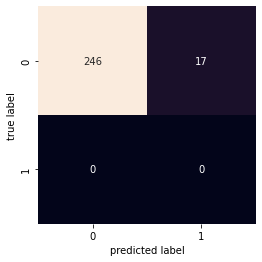

In [52]:
from sklearn.metrics import confusion_matrix
cm_svmpolinom2 = confusion_matrix(y_test_6, y_pred6)
sns.heatmap(cm_svmpolinom2.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

<function matplotlib.pyplot.show(close=None, block=None)>

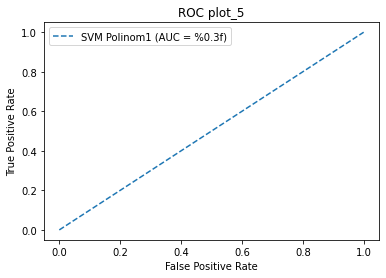

In [53]:
#menghitung roc
svclassifier_polinom2_fpr, svclassifier_polinom2_tpr, _ = roc_curve(y_test_5, y_pred5)

#roc curve
plt.plot(svclassifier_polinom2_fpr, svclassifier_polinom2_tpr, linestyle = '--', label = 'SVM Polinom1 (AUC = %0.3f)')

plt.title('ROC plot_5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

SVM RBF

In [54]:
###REPEATED HOLDOUT####

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
svclassifier_rbf = SVC(kernel='rbf')

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(x, y, test_size=0.25)
    svclassifier_rbf=svclassifier_rbf.fit(x_train_7,y_train_7)
    y_pred7 = svclassifier_rbf.predict(x_test_7)
    cm.append((confusion_matrix(y_test_7, y_pred7)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti    
akurasi7=np.mean(ac)
spesifisiti7=np.mean(sp)
sensitiviti7=np.mean(se)
print(akurasi7)
print(spesifisiti7)
print(sensitiviti7)

df_k7=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k7=pd.concat([df_k7,pd.DataFrame(test[i])],axis=1)
df_k7.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k7

#menghitung auc
auc_svclassifier_rbf7= round(roc_auc_score(y_test_7, y_pred7)*100, 2)
auc_svclassifier_rbf7

0.9363636363636363
0.0
1.0


50.0

Text(0.5, 15.0, 'predicted label')

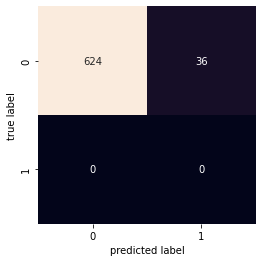

In [55]:
from sklearn.metrics import confusion_matrix
cm_svmrbf1 = confusion_matrix(y_test_7, y_pred7)
sns.heatmap(cm_svmrbf1.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

<function matplotlib.pyplot.show(close=None, block=None)>

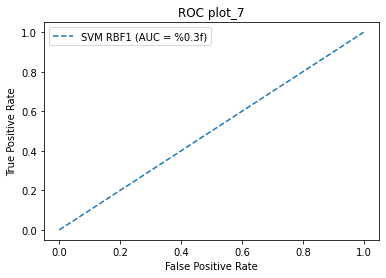

In [56]:
#menghitung roc
svclassifier_rbf_fpr, svclassifier_rbf_tpr, _ = roc_curve(y_test_7, y_pred7)

#roc curve
plt.plot(svclassifier_rbf_fpr, svclassifier_rbf_tpr, linestyle = '--', label = 'SVM RBF1 (AUC = %0.3f)')

plt.title('ROC plot_7')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

In [57]:
### METODE CV ###
from sklearn.model_selection import KFold
kf8 = KFold(n_splits=10, shuffle=False)
kf8.get_n_splits(x,y)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf8.split(y):
    x_train_8, x_test_8 = x.iloc[train_index], x.iloc[test_index]
    y_train_8, y_test_8 = y[train_index], y[test_index]

In [58]:
### METODE CV ###

svclassifier_rbf =  SVC(kernel='rbf', random_state=1)
from sklearn.metrics import confusion_matrix

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5

for j in range (n):
    
    svclassifier_rbf = svclassifier_rbf.fit(x_train_8,y_train_8)
    y_pred8 = svclassifier_rbf.predict(x_test_8)
    cm.append((confusion_matrix(y_test_8, y_pred8)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#menghitung akurasi, spesifikasi, dan sensitiviti
akurasi8=np.mean(ac)
spesifisiti8=np.mean(sp)
sensitiviti8=np.mean(se)
print(akurasi8)
print(spesifisiti8)
print(sensitiviti8)

df_k8=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k8=pd.concat([df_k8,pd.DataFrame(test[i])],axis=1)
df_k8.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k8

#menghitung auc
auc_svmrbf8= round(roc_auc_score(y_test_8, y_pred8)*100, 2)
auc_svmrbf8

0.935361216730038
0.0
1.0


50.0

<function matplotlib.pyplot.show(close=None, block=None)>

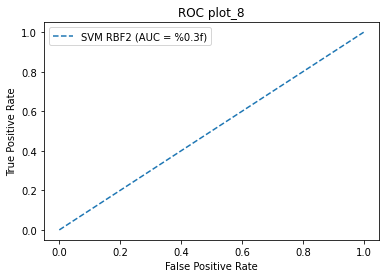

In [59]:
#menghitung roc
svclassifier_rbf2_fpr, svclassifier_rbf2_tpr, _ = roc_curve(y_test_8, y_pred8)

#roc curve
plt.plot(svclassifier_rbf2_fpr, svclassifier_rbf2_tpr, linestyle = '--', label = 'SVM RBF2 (AUC = %0.3f)')

plt.title('ROC plot_8')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

Text(0.5, 15.0, 'predicted label')

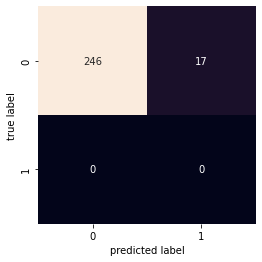

In [60]:
from sklearn.metrics import confusion_matrix
cm_svmrbf2 = confusion_matrix(y_test_8, y_pred8)
sns.heatmap(cm_svmrbf2.T, square=True, annot=True, fmt='d', cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')